<a href="https://colab.research.google.com/github/uuuuju/Image-Processing/blob/main/Edge_Detection_BITS_Edition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
from skimage import io
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow    
from skimage import io
from PIL import Image
%matplotlib inline 
from matplotlib import pyplot as plt
import pylab


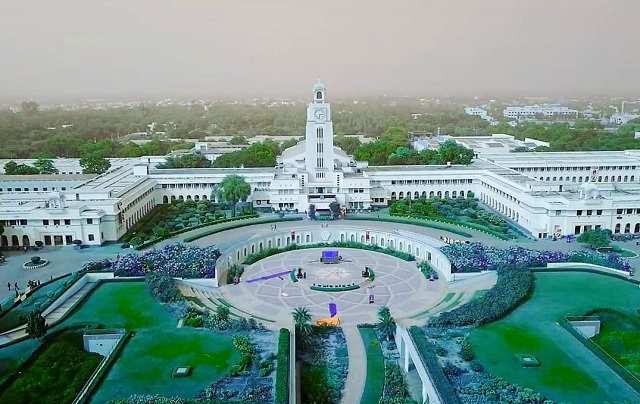

In [3]:
urls = ["https://www.bits-pilani.ac.in/Uploads/Pilani/pilanimanagementadmin/Gallery/2019-3-3--0-46-32-245_43375021_2258639734354556_1707337409550614528_n.jpg"]
for url in urls:
  BITS = io.imread(url)
  cv2_imshow(BITS)

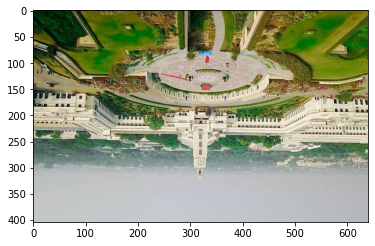

In [4]:
flipped_BITS =cv.flip(BITS,0) 
plt.imshow(flipped_BITS)

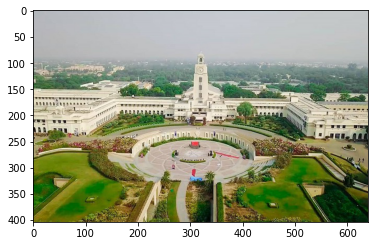

In [5]:
MIRRORED_BITS =cv.flip(BITS,1) #MIRRORING
plt.imshow(MIRRORED_BITS)

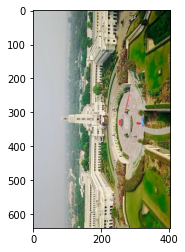

In [9]:
Sleeping_BITS = cv.transpose(BITS)
plt.imshow(Sleeping_BITS)

In [10]:
for i in range(0,3):
   min_value, max_value, min_location, max_location = cv.minMaxLoc(BITS[:,:,i])
   print("min {} is at {}, and max {} is at {}".format(min_value, min_location, max_value, max_location))

min 0.0 is at (265, 150), and max 255.0 is at (322, 96)
min 0.0 is at (621, 167), and max 255.0 is at (322, 96)
min 0.0 is at (394, 152), and max 255.0 is at (368, 230)


In [23]:
outline = np.zeros((BITS.shape), np.uint8)

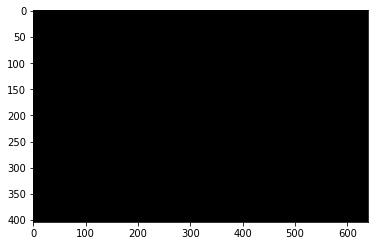

In [24]:
plt.imshow(outline)

In [27]:
outline[250:350,210:450,1] = 200;

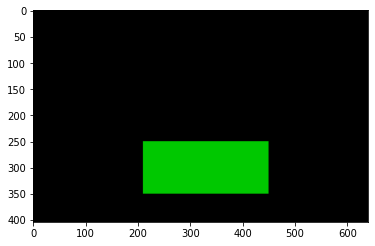

In [28]:
plt.imshow(outline)

In [29]:
BITS_without_rotunda = cv.add(outline, BITS) 

😢😢😢😢😢😢 No Rotundaaa 😢😢😢😢😢😢

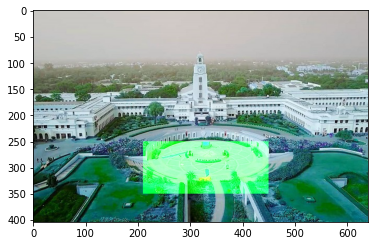

In [30]:
plt.imshow(cv.cvtColor(BITS_without_rotunda, cv.COLOR_BGR2RGB))

Big BITS

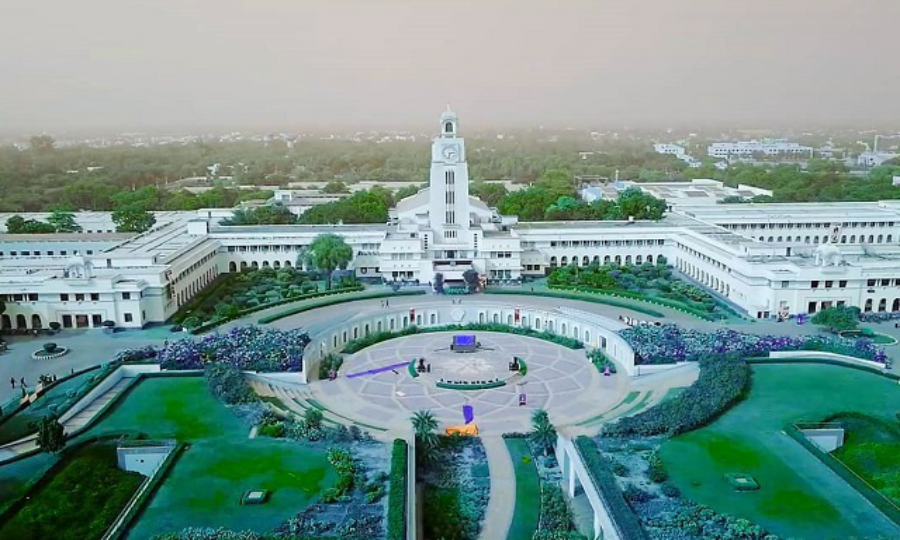

In [41]:
Big_BITS = cv.resize(BITS, (900,540))
cv2_imshow(Big_BITS)

Small BITS

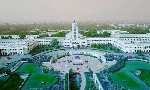

In [39]:
Small_BITS = cv.resize(BITS, (150,90))
cv2_imshow(Small_BITS)


**Noise Reduction using Gaussian Kernel**

BITS in the beginning of November:

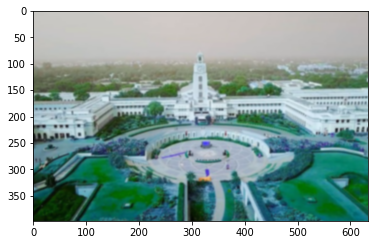

In [31]:
d=3
Blurry_BITS3 = cv.GaussianBlur(BITS, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv.cvtColor(Blurry_BITS3, cv.COLOR_BGR2RGB))

BITS in the mid-November:

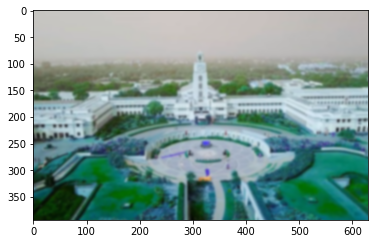

In [32]:
d=5
Blurry_BITS5 = cv.GaussianBlur(BITS, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv.cvtColor(Blurry_BITS5, cv.COLOR_BGR2RGB))

BITS in December: ❄❄❄❄❄❄

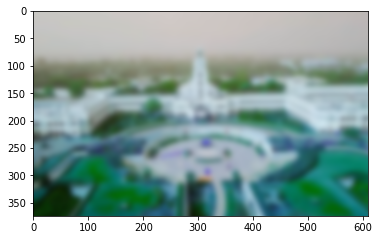

In [33]:
d=15
Blurry_BITS15 = cv.GaussianBlur(BITS, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

plt.imshow(cv.cvtColor(Blurry_BITS15, cv.COLOR_BGR2RGB))

Edge Detection

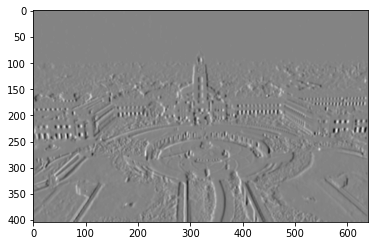

In [45]:
sobelimage=cv.cvtColor(BITS,cv.COLOR_BGR2GRAY)
sobelx = cv.Sobel(sobelimage,cv.CV_64F,1,0,ksize=9)
sobely = cv.Sobel(sobelimage,cv.CV_64F,0,1,ksize=9)
plt.imshow(sobelx,cmap = 'gray') 

Canny Edge Detection

In [46]:
Th1 = 30
Th2 = 60
d = 3

edgeresult = BITS.copy()
edgeresult = cv.GaussianBlur(edgeresult, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

gray = cv.cvtColor(edgeresult, cv.COLOR_BGR2GRAY)

edge = cv.Canny(gray, Th1, Th2)


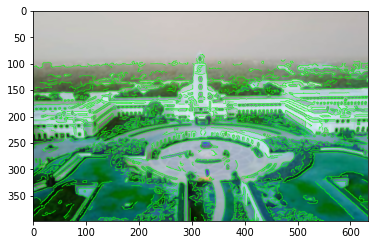

In [47]:
edgeresult[edge != 0] = (0, 255, 0) 
plt.imshow(cv.cvtColor(edgeresult, cv.COLOR_BGR2RGB))


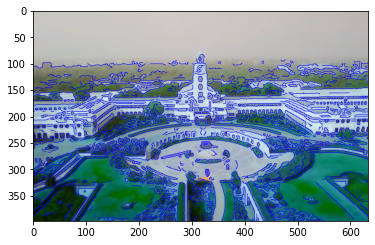

In [48]:
edgeresult[edge != 0] = (255, 0, 0) 
plt.imshow(cv.cvtColor(edgeresult, cv.COLOR_BGR2RGB))

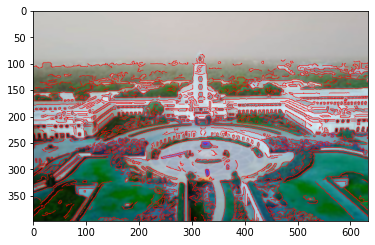

In [49]:
edgeresult[edge != 0] = (0, 0, 255) 
plt.imshow(cv.cvtColor(edgeresult, cv.COLOR_BGR2RGB))